In [1]:
import pm4py
log_all = pm4py.read_xes('BPI_Challenge_2019.xes')

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 251734/251734 [03:54<00:00, 1071.96it/s]


In [2]:
print(f'activities: {list(pm4py.get_event_attribute_values(log_all,"concept:name").keys())}')

activities: ['SRM: Created', 'SRM: Complete', 'SRM: Awaiting Approval', 'SRM: Document Completed', 'SRM: In Transfer to Execution Syst.', 'SRM: Ordered', 'SRM: Change was Transmitted', 'Create Purchase Order Item', 'Vendor creates invoice', 'Record Goods Receipt', 'Record Invoice Receipt', 'Clear Invoice', 'Record Service Entry Sheet', 'SRM: Transfer Failed (E.Sys.)', 'Cancel Goods Receipt', 'Vendor creates debit memo', 'Cancel Invoice Receipt', 'Change Delivery Indicator', 'Remove Payment Block', 'SRM: Deleted', 'Change Price', 'Delete Purchase Order Item', 'SRM: Transaction Completed', 'Change Quantity', 'Change Final Invoice Indicator', 'SRM: Incomplete', 'SRM: Held', 'Receive Order Confirmation', 'Cancel Subsequent Invoice', 'Reactivate Purchase Order Item', 'Update Order Confirmation', 'Block Purchase Order Item', 'Change Approval for Purchase Order', 'Release Purchase Order', 'Record Subsequent Invoice', 'Set Payment Block', 'Create Purchase Requisition Item', 'Change Storage Loc

In [78]:
from exdpn.petri_net import get_petri_net
log = pm4py.filter_event_attribute_values(
    log_all,
    "concept:name",
    ['Create Purchase Order Item', 'Vendor creates invoice', 'Record Goods Receipt', 'Record Invoice Receipt', 
    'Clear Invoice', 'Record Service Entry Sheet', 'Cancel Goods Receipt', 
    'Vendor creates debit memo', 'Cancel Invoice Receipt', 'Change Delivery Indicator', 'Remove Payment Block', 
    'Change Price', 'Delete Purchase Order Item', 'Change Quantity', 
    'Change Final Invoice Indicator', 'Receive Order Confirmation', 'Cancel Subsequent Invoice', 
    'Reactivate Purchase Order Item', 'Update Order Confirmation', 'Block Purchase Order Item', 
    'Change Approval for Purchase Order', 'Release Purchase Order', 'Record Subsequent Invoice', 'Set Payment Block', 
    'Create Purchase Requisition Item', 'Change Storage Location', 'Change Currency', 'Change payment term', 
    'Change Rejection Indicator', 'Release Purchase Requisition'],
    level="event",
    retain=True)

print("Number of different trace variants - subtraces: ", len(pm4py.get_variants_as_tuples(log)))



Number of different trace variants - subtraces:  11733


In [79]:
log_start = pm4py.get_start_activities(log)
print(log_start)
filtered_log = pm4py.filter_start_activities(log, 'Create Purchase Order Item')
print("Number of different trace variants - subtraces: ", len(pm4py.get_variants_as_tuples(filtered_log)))

end_activities = pm4py.get_end_activities(log)
print(end_activities)
filtered_log = pm4py.filter_end_activities(log, ["Clear Invoice"])

print("Number of different trace variants - subtraces: ", len(pm4py.get_variants_as_tuples(filtered_log)))

#pm4py.write_xes(log, "BPI_Challenge_2019_srm_filtered.xes")

{'Create Purchase Order Item': 201225, 'Vendor creates invoice': 3459, 'Vendor creates debit memo': 122, 'Create Purchase Requisition Item': 46526, 'Change Approval for Purchase Order': 378, 'Change Currency': 2, 'Release Purchase Order': 22}
Number of different trace variants - subtraces:  9355
{'Clear Invoice': 181395, 'Create Purchase Order Item': 4505, 'Change Delivery Indicator': 718, 'Record Service Entry Sheet': 922, 'Record Invoice Receipt': 23094, 'Delete Purchase Order Item': 8127, 'Vendor creates debit memo': 5, 'Record Goods Receipt': 22776, 'Change Final Invoice Indicator': 3, 'Remove Payment Block': 5397, 'Change Quantity': 525, 'Cancel Invoice Receipt': 1348, 'Change Price': 532, 'Set Payment Block': 61, 'Block Purchase Order Item': 167, 'Receive Order Confirmation': 232, 'Reactivate Purchase Order Item': 14, 'Cancel Goods Receipt': 440, 'Change Approval for Purchase Order': 1346, 'Change Currency': 1, 'Cancel Subsequent Invoice': 24, 'Vendor creates invoice': 68, 'Updat

In [114]:
# We discard less frequent variants in order to reduce
# the number of edge cases.
log = pm4py.filter_variants_top_k(filtered_log, 15)

pm4py.write_xes(log, "BPI_Challenge_2019_filtered_top_k.xes")
print(len(filtered_log))
len(log)

exporting log, completed traces :: 100%|██████████| 145885/145885 [01:40<00:00, 1452.56it/s]

181395


145885

### Analysis

In [1]:
import pm4py
log = pm4py.read_xes("BPI_Challenge_2019_filtered_top_k.xes")

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 145885/145885 [02:20<00:00, 1038.86it/s]


In [9]:
#log_sample_idx = [int(x) for x in np.linspace(0, len(log), int(len(log)/4))]
log_sample = log[int((len(log)/4)*2):int((len(log)/4)*3.5)]
#log_sample = log[10000:20000]
len(log_sample)

54707

In [10]:
from exdpn.petri_net import get_petri_net
net, im, fm = get_petri_net(log_sample, miner_type='IM')

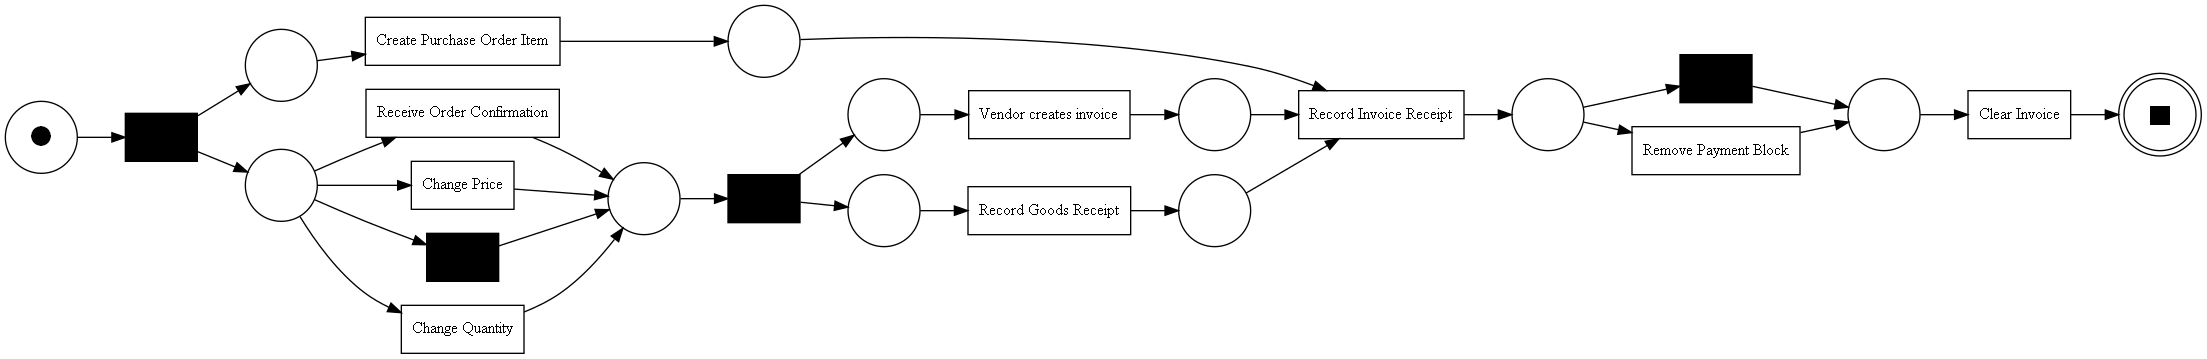

In [11]:
pm4py.view_petri_net(net, im, fm)

In [5]:
event_attrs = list(pm4py.get_event_attributes(log))
trace_attrs = list(pm4py.get_trace_attributes(log))

In [6]:
event_attrs = [attr for attr in event_attrs if max(list(pm4py.get_event_attribute_values(log, attr).values())) != 1 and "ID" not in attr]
event_attrs.remove("time:timestamp")
event_attrs.remove("org:resource")
event_attrs.remove("User")
event_attrs

['concept:name', 'Cumulative net worth (EUR)']

In [7]:
trace_attrs = [attr for attr in trace_attrs if max(list(pm4py.get_trace_attribute_values(log, attr).values())) != 1 and "ID" not in attr]
trace_attrs.remove("Name")
trace_attrs.remove("Purchasing Document")
trace_attrs.remove("Item")
#trace_attrs.remove("Source")
#trace_attrs.remove("Company")
trace_attrs

['Item Category',
 'GR-Based Inv. Verif.',
 'Vendor',
 'Spend area text',
 'Sub spend area text',
 'Document Type',
 'Purch. Doc. Category name',
 'Goods Receipt',
 'Spend classification text',
 'Item Type',
 'Source',
 'Company']

### Without hyperparameter:

In [12]:
from exdpn.data_petri_net import Data_Petri_Net
from exdpn.guards import ML_Technique

ml_list = [ML_Technique.DT, ML_Technique.LR, ML_Technique.RF, ML_Technique.SVM, ML_Technique.NN]#, ML_Technique.XGB]

dpn = Data_Petri_Net(log_sample, petri_net=net, initial_marking=im, final_marking=fm,
                     event_level_attributes=event_attrs,
                     case_level_attributes=trace_attrs,
                     ml_list=ml_list, 
                     verbose=True, 
                     #impute=True,
                     CV_splits = 3, 
                     hyperparameters={ML_Technique.NN: {},
                                      ML_Technique.DT: {},
                                      ML_Technique.LR: {},
                                      ML_Technique.SVM: {},
                                      ML_Technique.RF: {}#,
                                      #ML_Technique.XGB: {}
                                      })

-> Mining guard datasets... Done
-> Evaluating guards at decision point 'p_13'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
best = dpn.get_best()

-> Best machine learning technique at decision point 'p_4': Decision Tree w/ performance 1.0


In [ ]:
import pandas as pd

res = pd.DataFrame(columns=["place"] + [str(ml_t for ml_t in ml_list)])

for dp,gm in dpn.guard_manager_per_place.items():
    res_row = {"place":dp} | {str(ml_t):gm.f1_mean_test[ml_t] for ml_t in gm.guards_list.keys()}
    res = res.append([res_row])

res['place'] = res['place'].apply(str)
res.index = res["place"]
res.drop(["place"], axis=1, inplace=True)
res.dropna(axis=1, how="all", inplace=True)

In [ ]:
res.transpose()

place,p_4
Decision Tree,1.0
Logistic Regression,1.0
Random Forest,1.0
Support Vector Machine,1.0
Neural Network,1.0


In [21]:
#import seaborn as sns
#sns.heatmap(res.transpose(), annot=True, cmap="PiYG",center=0.7)

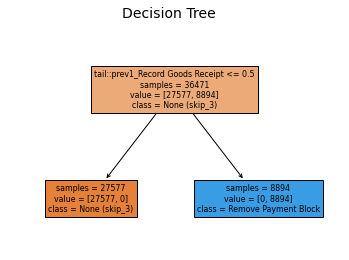

In [22]:
dps = list(dpn.decision_points)
for p in dps:
    dt_guard = dpn.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    dt_explainable_representation = dt_guard.get_explainable_representation()

### Hyperparameter Selection

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np 
from exdpn.petri_net import get_petri_net
from exdpn.guard_datasets import extract_all_datasets
from exdpn.data_preprocessing import basic_data_preprocessing
from exdpn.data_preprocessing.data_preprocessing import apply_ohe, apply_scaling, fit_scaling, fit_ohe
from exdpn.guards import ML_Technique

# prepare data
dp_dataset_map = extract_all_datasets(log= log_sample, net=net, initial_marking=im, final_marking=fm, 
                                      event_level_attributes = event_attrs,
                                      case_level_attributes=trace_attrs)

# decision points 
dps = list(dp_dataset_map.keys())

#### Cross-Validation Decision Tree (with respect to explainablility)

We have observed that decision trees tend to be enormously large without any hyperparameters. We thus try to find an optimal `min_impurity_decrease` value.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'min_impurity_decrease':(0, 0.01, 0.05, 0.1, 0.15)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    dt_base = DecisionTreeClassifier()
    dt_grid = GridSearchCV(dt_base, parameters, n_jobs=-1, scoring='f1_weighted')

    dt_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(dt_grid.best_score_,4)}\t {dt_grid.best_params_}")
    best_values[dp] = dt_grid.best_params_['min_impurity_decrease']

min_impurity_decrease = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {min_impurity_decrease}")

In [ ]:
# decision tree without hyperparameter
for p in dps:
    dpn_temp = Data_Petri_Net(log_sample, petri_net=net, initial_marking=im, final_marking=fm,
                              event_level_attributes=event_attrs,
                              case_level_attributes=trace_attrs,
                              ml_list=[ML_Technique.DT], 
                              verbose=False, 
                              impute=True,
                              hyperparameters = {ML_Technique.DT: {}})
    dt_guard = dpn_temp.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    rep = dt_guard.get_explainable_representation()

In [ ]:
# decision tree with hyperparameter
for p in dps:
    dpn_temp = Data_Petri_Net(log_sample, petri_net=net, initial_marking=im, final_marking=fm,
                              event_level_attributes=event_attrs,
                              case_level_attributes=trace_attrs,
                              ml_list=[ML_Technique.DT], 
                              verbose=False, 
                              impute=True,
                              hyperparameters = {ML_Technique.DT: {'min_impurity_decrease': min_impurity_decrease}})
    dt_guard = dpn_temp.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    rep = dt_guard.get_explainable_representation()

#### Cross-Validaion Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
parameters = {'hidden_layer_sizes': ((5, ), (5, 5), (10, 10), (5, 10, 5), (10, 20, 10))}

best_values = {}
max_ds_size = -1
max_ds_key = None

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    if len(dp_dataset) > max_ds_size: max_ds_key = dp
    X_train, y_train = basic_data_preprocessing(dp_dataset)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    nn_base = MLPClassifier()
    nn_grid = GridSearchCV(nn_base, parameters, n_jobs=-1, scoring='f1_weighted')

    nn_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(nn_grid.best_score_,4)}\t {nn_grid.best_params_}")
    best_values[dp] = nn_grid.best_params_['hidden_layer_sizes']

hidden_layer_sizes = best_values[max_ds_key]
print(f"final value: {hidden_layer_sizes}")

#### Cross-Validation Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {'C': (0.1, 0.25, 0.5)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    lr_base = LogisticRegression()
    lr_grid = GridSearchCV(lr_base, parameters, n_jobs=-1, scoring='f1_weighted')

    lr_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(lr_grid.best_score_,4)}\t {lr_grid.best_params_}")
    best_values[dp] = lr_grid.best_params_['C']

C_lr = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {C_lr}")

#### Cross-Validation SVM:

In [ ]:
from sklearn.svm import LinearSVC
parameters = {'C':(0.1, 0.25, 0.5)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    svm_base = LinearSVC()
    svm_grid = GridSearchCV(svm_base, parameters, n_jobs=-1, scoring='f1_weighted')

    svm_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(svm_grid.best_score_,4)}\t {svm_grid.best_params_}")
    best_values[dp] = svm_grid.best_params_['C']

C_svm = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {C_svm}")

#### Cross-Validation XGBoost:

In [ ]:
from xgboost import XGBClassifier
parameters = {'max_depth': (1, 2, 3, 5, 10)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    xgb_base = XGBClassifier()
    xgb_grid = GridSearchCV(xgb_base, parameters, n_jobs=-1, scoring='f1_weighted')

    xgb_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(xgb_grid.best_score_,4)}\t {xgb_grid.best_params_}")
    best_values[dp] = xgb_grid.best_params_['max_depth']

max_depth_xgb = round(sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys()))
print(f"final value: {max_depth_xgb}")

### With hyperparameter:

In [ ]:
from exdpn.data_petri_net import Data_Petri_Net
from exdpn.guards import ML_Technique

ml_list = [ML_Technique.DT, ML_Technique.LR, ML_Technique.NN, ML_Technique.SVM, ML_Technique.RF, ML_Technique.XGB]

dpn_hp = Data_Petri_Net(log_sample, petri_net=net, initial_marking=im, final_marking=fm,
                     event_level_attributes=event_attrs,
                     case_level_attributes=trace_attrs,
                     ml_list=ml_list, 
                     verbose=True, 
                     #impute=True,
                     CV_splits = 3,
                     hyperparameters = {ML_Technique.NN: {'hidden_layer_sizes': hidden_layer_sizes}, 
                                        ML_Technique.DT: {'min_impurity_decrease': min_impurity_decrease},
                                        ML_Technique.LR: {"C": C_lr},
                                        ML_Technique.SVM: {"C": C_svm},
                                        ML_Technique.XGB: {"max_depth": max_depth_xgb},
                                        ML_Technique.RF: {'n_estimators': n_estimators,
                                                         'min_impurity_decrease': min_impurity_decrease}})

In [ ]:
best_hp = dpn_hp.get_best()

In [ ]:
res_hp = pd.DataFrame(columns=["place"] + [str(ml_t for ml_t in ml_list)])

for dp,gm in dpn_hp.guard_manager_per_place.items():
    res_row = {"place": dp} | {str(ml_t):gm.guards_results_mean[ml_t] for ml_t in gm.guards_list.keys()}
    res_hp = res_hp.append([res_row])
    
res_hp['place'] = res_hp['place'].apply(str)
res_hp.index = res_hp["place"]
res_hp.drop(["place"], axis=1, inplace=True)
res_hp.dropna(axis=1, how="all", inplace=True)

res_hp.transpose()

In [ ]:
dps_hp = list(dpn_hp.decision_points)
for p in dps_hp:
    dt_guard = dpn_hp.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    dt_explainable_representation = dt_guard.get_explainable_representation()

#### Summary:

In [ ]:
res.transpose()

In [ ]:
res_hp.transpose()